# Testing with nice images

** Scott Prahl**

** 23 Nov 2017, Version 1**

In [5]:
# Execute this cell first
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread 

import laserbeamsize as lbs

pixel_size_mm = 3.75/1000           # pixel size in mm for the camera

## Closely centered beam

Bright center, low background.  Could not be easier.  This is a Helium-Neon laser beam that is operating close to the TEM00 mode.

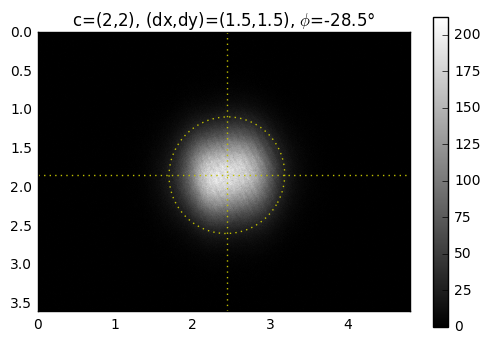

In [6]:
beam = imread("t-hene.pgm")

xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(beam)
lbs.plot_image_and_ellipse(beam,xc_found, yc_found, dx_found, dy_found, phi_found, scale=pixel_size_mm)

## Show that center and beam widths are quantitatively correct


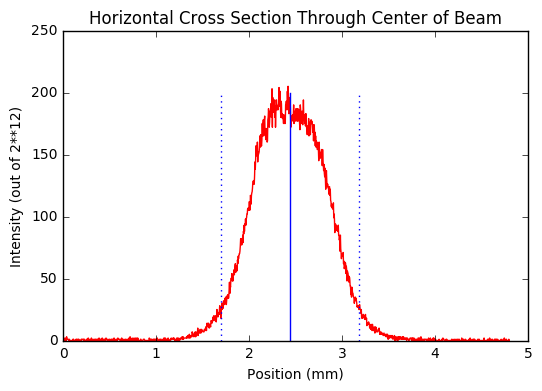

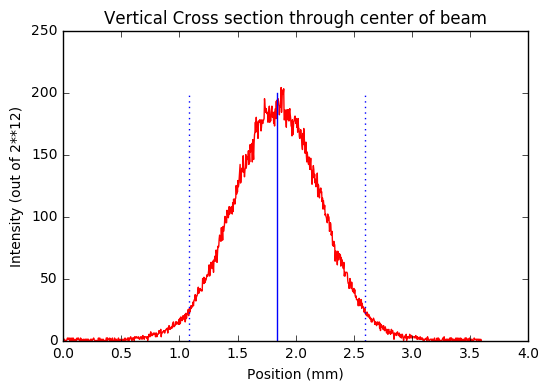

In [11]:
v,h = beam.shape
xcc = xc_found * pixel_size_mm
ycc = yc_found * pixel_size_mm
dxx = dx_found * pixel_size_mm
dyy = dy_found * pixel_size_mm

# plot a horizontal cross section 
xpos = np.arange(h)*pixel_size_mm
ypos = np.arange(v)*pixel_size_mm
hcenter=int(xc_found)
vcenter=int(yc_found)
plt.plot(xpos,beam[vcenter,:],color='red')
plt.plot([xcc,xcc],[0,200],color='blue')
plt.plot([xcc+dxx/2,xcc+dxx/2],[0,200],":",color='blue')
plt.plot([xcc-dxx/2,xcc-dxx/2],[0,200],":",color='blue')

plt.xlabel('Position (mm)')
plt.ylabel('Intensity (out of 2**12)')
plt.title("Horizontal Cross Section Through Center of Beam")
plt.show()

plt.plot(ypos,beam[:,hcenter],color='red')
plt.plot([ycc,ycc],[0,200],color='blue')
plt.plot([ycc+dyy/2,ycc+dyy/2],[0,200],":",color='blue')
plt.plot([ycc-dyy/2,ycc-dyy/2],[0,200],":",color='blue')

plt.xlabel('Position (mm)')
plt.ylabel('Intensity (out of 2**12)')
plt.title("Vertical Cross section through center of beam")
plt.show()

## Test with 12 different images near focus

In [12]:
# array of distances at which images were collected
z1 = [168,210,280,348,414,480,495,510,520,580,666,770] #mm

# array of filenames associated with each image
fn1 = ["t-%dmm.pgm" % number for number in z1]

# read them all into memory 
test_img = [imread(fn) for fn in fn1]

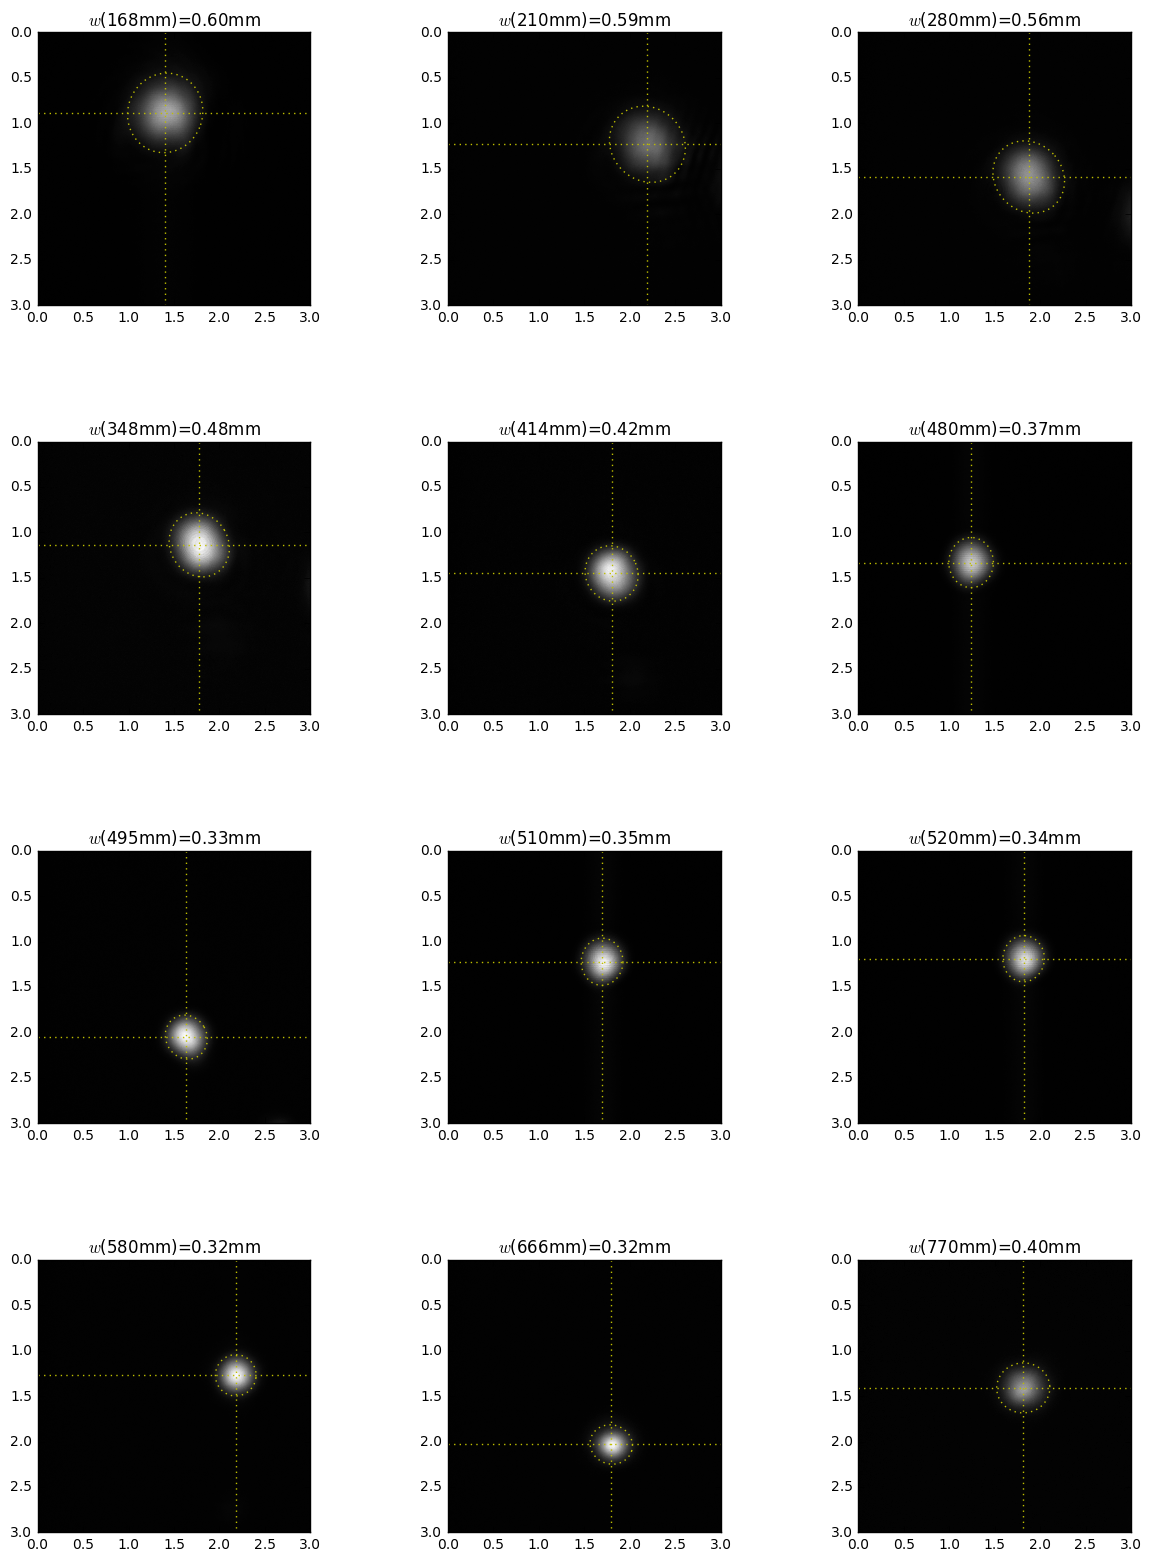

In [20]:
f, axs = plt.subplots(4,3,figsize=(15,15))

for i in range(12):
    plt.subplot(4,3,i+1)

    # show the beam image with actual dimensions on the axes
    v,h=test_img[i].shape
    plt.imshow(test_img[i], extent=[0,h* pixel_size_mm,v* pixel_size_mm,0], cmap='gray')

    # find the beam center and show it
    xc, yc, dx, dy, phi = lbs.beam_size(test_img[i])
    plt.plot([xc* pixel_size_mm,xc* pixel_size_mm],[0,v* pixel_size_mm],':y')
    plt.plot([0,h* pixel_size_mm],[yc* pixel_size_mm,yc* pixel_size_mm],':y')

    # show ellipse around beam
    xp,yp = lbs.ellipse_arrays(xc,yc,dx,dy,phi)
    plt.plot(xp* pixel_size_mm,yp* pixel_size_mm,':y')

    plt.xlim(0,h* pixel_size_mm)
    plt.ylim(v* pixel_size_mm,0)

    # calculate 1/e^2 radius for symmetric beam to label image
    r=np.sqrt(dx**2+dy**2)/2*pixel_size_mm
    plt.title('$w$(%dmm)=%.2fmm'%(z1[i],r))

plt.subplots_adjust(bottom=0.0, top=1.0, hspace=0.5)
plt.show()